# Exercise 1.1

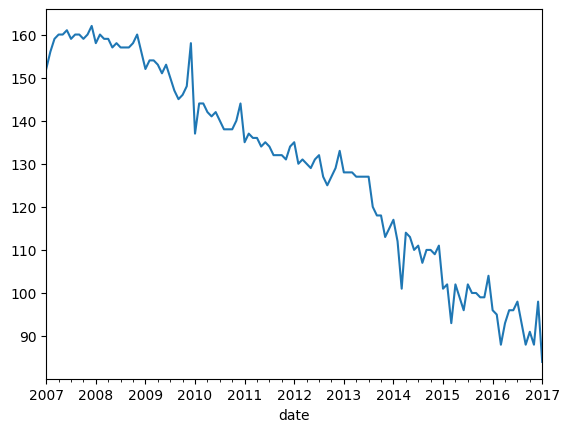

In [4]:
import pandas as pd
import duckdb
from constants import GRAY_1, GRAY_2, GRAY_3, BLUE_1

df = pd.read_csv("data/norway_new_car_sales_by_month.csv")
df = duckdb.query(
    """
    SELECT avg_CO2, import, quantity, year, month
    FROM df

"""
).df()

df["date"] = pd.to_datetime(
    df["Year"].astype(str) + "-" + df["Month"].astype(str).str.zfill(2), format="%Y-%m"
)

df = df.set_index("date")

ax = df["Avg_CO2"].plot()

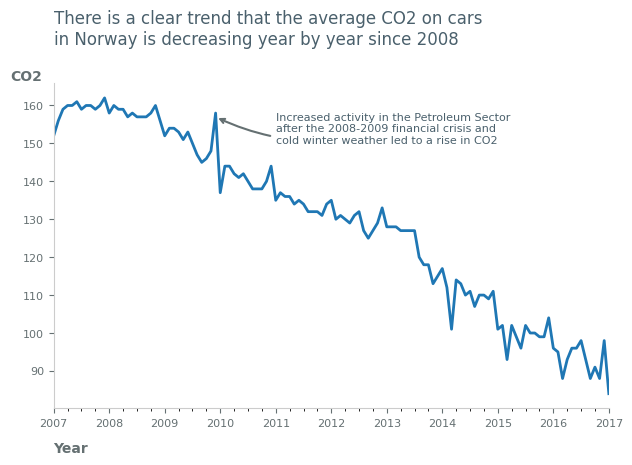

In [36]:
ax = df["Avg_CO2"].plot(linewidth=2)


ax.spines[["top", "right"]].set_visible(False)
ax.spines[["left", "bottom"]].set_color(GRAY_1)

ax.tick_params(axis="both", colors=GRAY_2, labelsize = 8)

ax.set_xlabel("Year", color=GRAY_2, fontsize=10, fontweight="bold")
ax.set_ylabel("CO2", color=GRAY_2, fontsize=10, fontweight="bold", rotation=0)
ax.xaxis.set_label_coords(0.031, -0.1)
ax.yaxis.set_label_coords(-0.05, 1)

ax.set_title(
    "There is a clear trend that the average CO2 on cars\nin Norway is decreasing year by year since 2008",
    loc="left",
    pad=28,
    color=GRAY_3
)

arrowprops = dict(
    arrowstyle = "->",
    connectionstyle = f"arc3, rad=-.2",
    linewidth=1.5,
    color=GRAY_2
)

ax.annotate(
    text="Increased activity in the Petroleum Sector\nafter the 2008-2009 financial crisis and\ncold winter weather led to a rise in CO2",
    xy=(pd.Timestamp("2009-12-01"), 157),
    fontsize=8,
    color=GRAY_3,
    arrowprops=arrowprops,
    xytext=(pd.Timestamp("2011-01-01"), 150)
)


fig = ax.get_figure()
fig.tight_layout()
fig.savefig("figures/CO2_Emission_trend.png")